In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_memberships

####### import data
meta_fixed_data=pd.read_csv("res_meta_fixed.txt", header=0, sep="\t")

meta_rand_data=pd.read_csv("res_meta_rand.txt", header=0, sep="\t")
print("data read")

ModuleNotFoundError: No module named 'upsetplot'

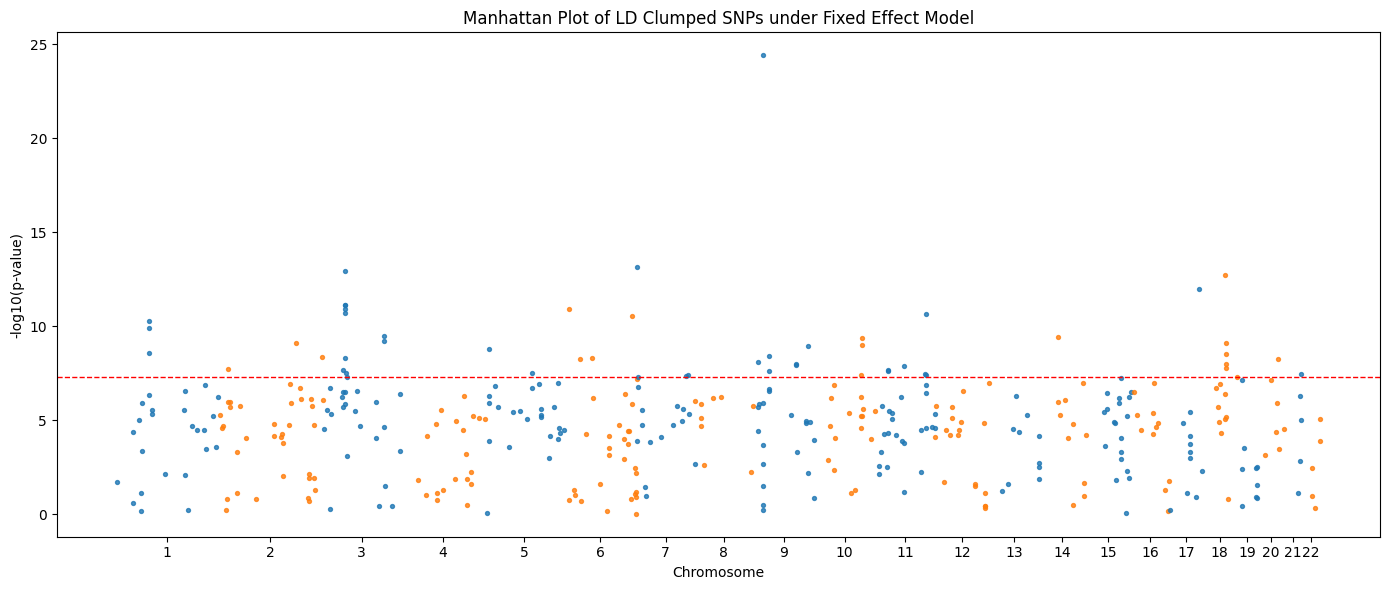

In [9]:
### Fixed effects Manhatten plot

# Clean and prepare the data
df = meta_fixed_data.copy()
df = df.dropna(subset=['CHR', 'BP', 'Pval'])
df['CHR'] = df['CHR'].astype(str).str.replace('chr', '', case=False).astype(int)
df = df.sort_values(['CHR', 'BP'])
df['Pval'] = df['Pval'].replace(0, 1e-300)            # replace rows with p = 0 to 1e-300
df['-log10(P)'] = -np.log10(df['Pval'])

# Cumulative base pair positions
df['BP_cum'] = 0
chrom_offsets = {}
offset = 0
for chrom in sorted(df['CHR'].unique()):
    idx = df['CHR'] == chrom
    df.loc[idx, 'BP_cum'] = df.loc[idx, 'BP'] + offset
    chrom_offsets[chrom] = {
        'start': offset,
        'end': df.loc[idx, 'BP_cum'].max(),
        'count': idx.sum()
    }
    offset = chrom_offsets[chrom]['end']

# Tick labels and positions
ticks = [(v['start'] + v['end']) / 2 for v in chrom_offsets.values()]
labels = [str(k) for k in chrom_offsets.keys()]
chrom_starts = [v['start'] for v in chrom_offsets.values()]
snp_counts = [v['count'] for v in chrom_offsets.values()]

# Plot setup
fig, ax1 = plt.subplots(figsize=(14, 6))

# Manhattan plot on ax1
colors_pts = ['#1f77b4', '#ff7f0e']
for i, (chrom, group) in enumerate(df.groupby('CHR')):
    ax1.scatter(group['BP_cum'], group['-log10(P)'],
                c=colors_pts[i % 2], s=8, alpha=0.8, zorder=2)

# Significance lines on ax1
ax1.axhline(y=-np.log10(5e-8), color='red', linestyle='--', linewidth=1)

# Axis formatting
ax1.set_xticks(ticks)
ax1.set_xticklabels(labels)
ax1.set_xlabel("Chromosome")
ax1.set_ylabel("-log10(p-value)")
ax1.set_title("Manhattan Plot of LD Clumped SNPs under Fixed Effect Model")
plt.tight_layout()
plt.show()


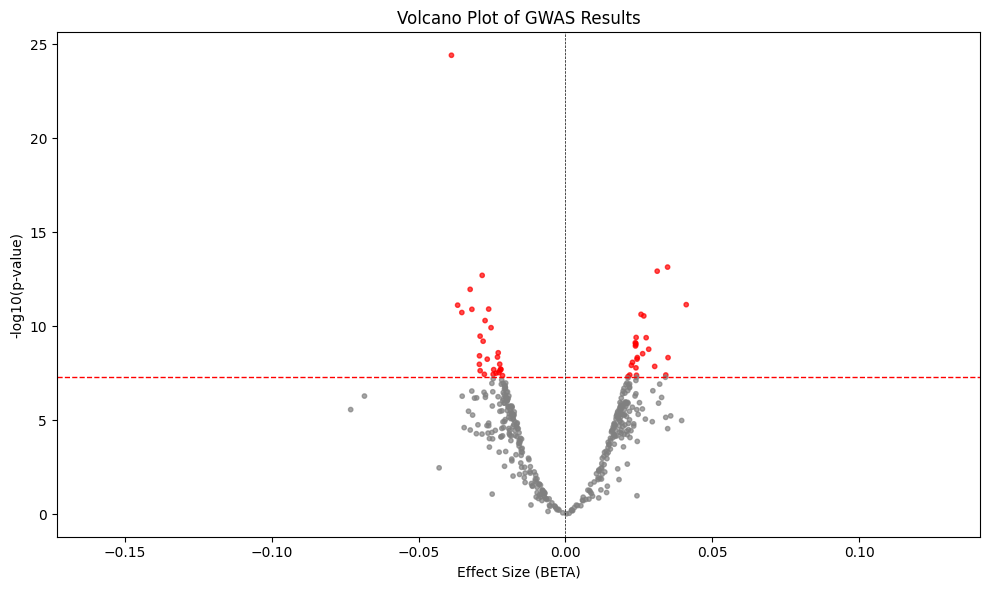

In [4]:
## Volcano Plot of fixed effects pooled betas

# Copy data and ensure numeric types
df = meta_fixed_data.copy()
df['BETA'] = pd.to_numeric(df['BETA'], errors='coerce')
df['Pval'] = pd.to_numeric(df['Pval'], errors='coerce')

# Fix invalid p-values (remove or replace)
df = df[df['Pval'].notna() & df['BETA'].notna()]        # drop rows with missing values
df['Pval'] = df['Pval'].replace(0, 1e-300)            # replace rows with p = 0 to 1e-300

# Compute -log10(P)
df['-log10(P)'] = -np.log10(df['Pval'])

# Threshold for genome-wide significance
sig_thresh = 5e-8
df['significant'] = df['Pval'] < sig_thresh

# Color by significance
colors = df['significant'].map({True: 'red', False: 'gray'})

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['BETA'], df['-log10(P)'], c=colors, s=10, alpha=0.7)

# Axes and lines
plt.axhline(-np.log10(sig_thresh), color='red', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)

# Expand x-axis to match real range
plt.xlim(df['BETA'].min() - 0.1, df['BETA'].max() + 0.1)

plt.xlabel("Effect Size (BETA)")
plt.ylabel("-log10(p-value)")
plt.title("Volcano Plot of Fixed Model Results")
plt.tight_layout()
plt.show()

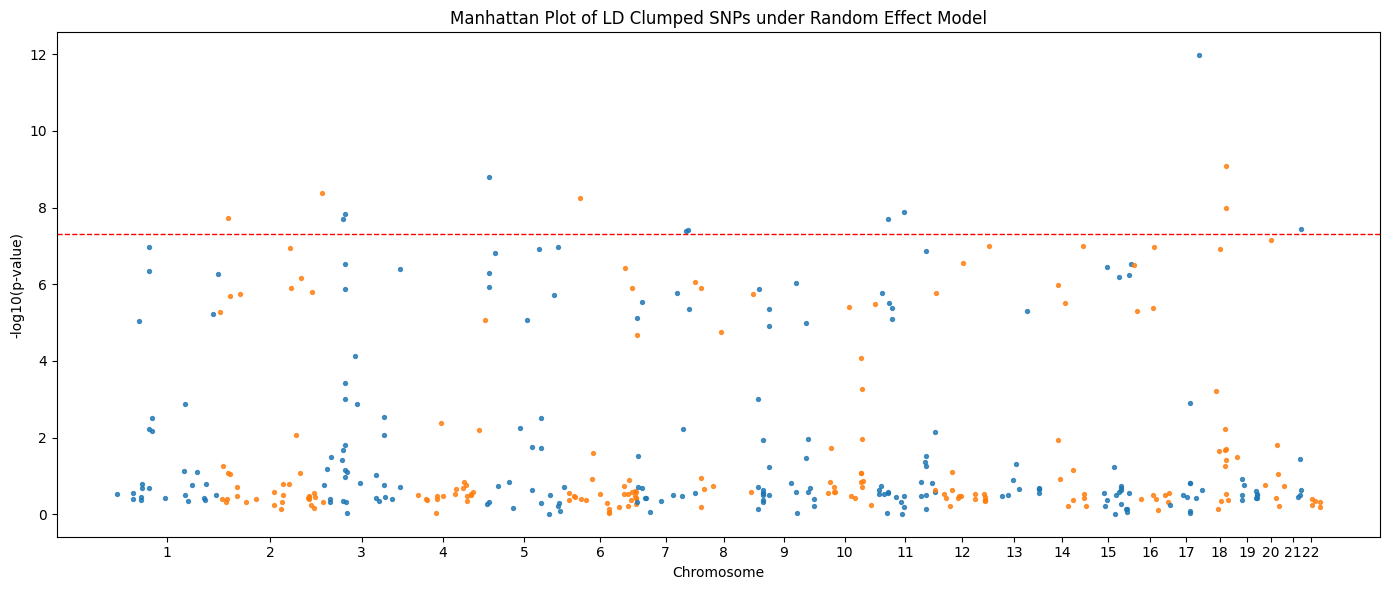

In [8]:
### Random effects Manhatten plot

# Clean and prepare the data
df = meta_rand_data.copy()
df = df.dropna(subset=['CHR', 'BP', 'Pval'])
df['CHR'] = df['CHR'].astype(str).str.replace('chr', '', case=False).astype(int)
df = df.sort_values(['CHR', 'BP'])
df['Pval'] = df['Pval'].replace(0, 1e-300)            # replace rows with p = 0 to 1e-300
df['-log10(P)'] = -np.log10(df['Pval'])

# Cumulative base pair positions
df['BP_cum'] = 0
chrom_offsets = {}
offset = 0
for chrom in sorted(df['CHR'].unique()):
    idx = df['CHR'] == chrom
    df.loc[idx, 'BP_cum'] = df.loc[idx, 'BP'] + offset
    chrom_offsets[chrom] = {
        'start': offset,
        'end': df.loc[idx, 'BP_cum'].max(),
        'count': idx.sum()
    }
    offset = chrom_offsets[chrom]['end']

# Tick labels and positions
ticks = [(v['start'] + v['end']) / 2 for v in chrom_offsets.values()]
labels = [str(k) for k in chrom_offsets.keys()]
chrom_starts = [v['start'] for v in chrom_offsets.values()]
snp_counts = [v['count'] for v in chrom_offsets.values()]

# Plot setup
fig, ax1 = plt.subplots(figsize=(14, 6))

# Manhattan plot on ax1
colors_pts = ['#1f77b4', '#ff7f0e']
for i, (chrom, group) in enumerate(df.groupby('CHR')):
    ax1.scatter(group['BP_cum'], group['-log10(P)'],
                c=colors_pts[i % 2], s=8, alpha=0.8, zorder=2)

# Significance lines on ax1
ax1.axhline(y=-np.log10(5e-8), color='red', linestyle='--', linewidth=1)

# Axis formatting
ax1.set_xticks(ticks)
ax1.set_xticklabels(labels)
ax1.set_xlabel("Chromosome")
ax1.set_ylabel("-log10(p-value)")
ax1.set_title("Manhattan Plot of LD Clumped SNPs under Random Effect Model")
plt.tight_layout()
plt.show()

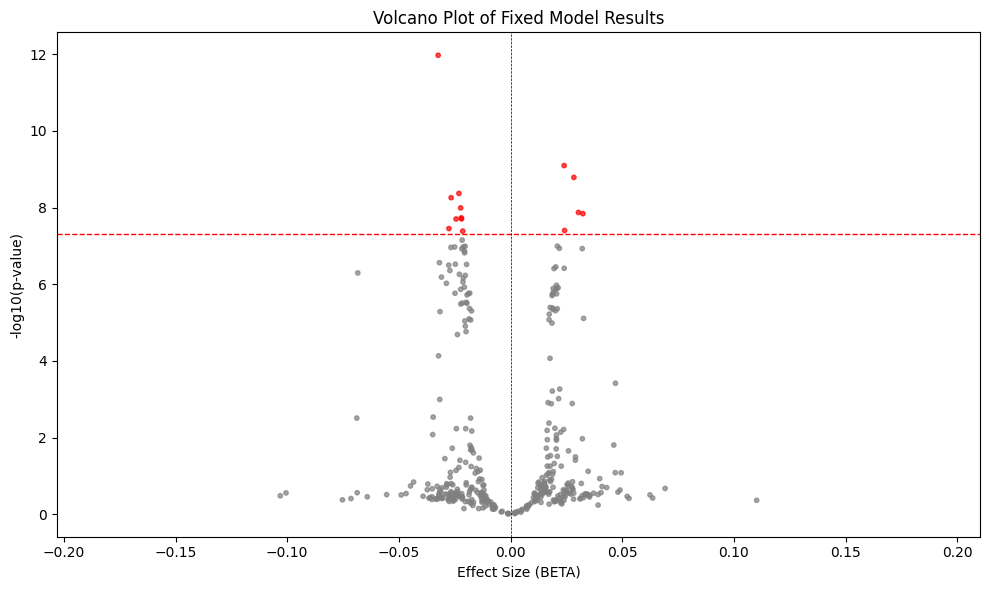

In [6]:
## Volcano Plot of Random effects pooled betas

# Copy data and ensure numeric types
df = meta_rand_data.copy()
df['BETA'] = pd.to_numeric(df['BETA'], errors='coerce')
df['Pval'] = pd.to_numeric(df['Pval'], errors='coerce')

# Fix invalid p-values (remove or replace)
df = df[df['Pval'].notna() & df['BETA'].notna()]        # drop rows with missing values
df['Pval'] = df['Pval'].replace(0, 1e-300)            # replace rows with p = 0 to 1e-300

# Compute -log10(P)
df['-log10(P)'] = -np.log10(df['Pval'])

# Threshold for genome-wide significance
sig_thresh = 5e-8
df['significant'] = df['Pval'] < sig_thresh

# Color by significance
colors = df['significant'].map({True: 'red', False: 'gray'})

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['BETA'], df['-log10(P)'], c=colors, s=10, alpha=0.7)

# Axes and lines
plt.axhline(-np.log10(sig_thresh), color='red', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)

# Expand x-axis to match real range
plt.xlim(df['BETA'].min() - 0.1, df['BETA'].max() + 0.1)

plt.xlabel("Effect Size (BETA)")
plt.ylabel("-log10(p-value)")
plt.title("Volcano Plot of Fixed Model Results")
plt.tight_layout()
plt.show()

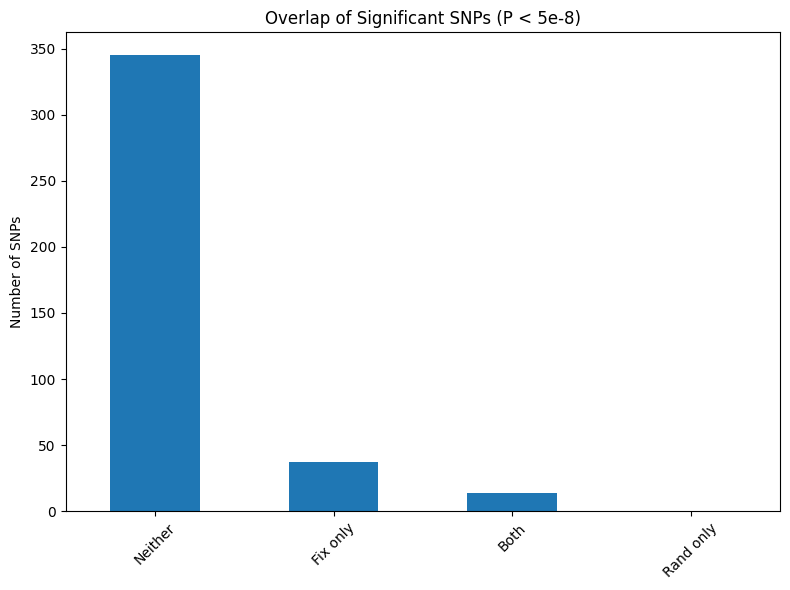

In [12]:
## plot with fixed effect pval on X and random effect on Y

# Copy data and ensure numeric types
rand = meta_rand_data.copy()
fix = meta_fixed_data.copy()
df['Pval'] = pd.to_numeric(df['Pval'], errors='coerce')

# Define threshold
threshold = 5e-8

# Create sets of SNPs
sig_fix = set(fix.loc[fix['Pval'] < threshold, 'SNP'])
sig_rand = set(rand.loc[rand['Pval'] < threshold, 'SNP'])

# All SNPs from both datasets
all_snps = set(fix['SNP']).union(set(rand['SNP']))

# Categorize SNPs
categories = {
    'Fix only': sig_fix - sig_rand,
    'Rand only': sig_rand - sig_fix,
    'Both': sig_fix & sig_rand,
    'Neither': all_snps - (sig_fix | sig_rand)
}

# Count SNPs per category
counts = {key: len(value) for key, value in categories.items()}

# Create a DataFrame for plotting
df_counts = pd.DataFrame.from_dict(counts, orient='index', columns=['Count'])
df_counts = df_counts.sort_values('Count', ascending=False)

# Plot as bar chart
plt.figure(figsize=(8, 6))
df_counts['Count'].plot(kind='bar')
plt.title("Overlap of Significant SNPs (P < 5e-8)")
plt.ylabel("Number of SNPs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
